在实际应用中，我们通常会使用更复杂的model结构来当作CNN的主干架构，接下来让我们来试试GoogLeNet和ResNet和之前有什么不同。

GoogLeNet 和 ResNet 是两种先进的卷积神经网络架构，它们在某些方面相比于传统的卷积神经网络（CNN）有显著的优势，同时也有各自的缺点。以下是对它们的详细比较：

**GoogLeNet (Inception)**

GoogLeNet 是 2014 年由 Google 提出的网络架构，也被称为 Inception 网络。其主要特点是 Inception 模块。

**优势：**

	1.	Inception 模块：
	•	Inception 模块允许网络在不同的层级上进行卷积和池化操作，然后将结果连接起来。这样可以在一个模块中捕获不同的特征尺度。
	•	通过组合 1x1、3x3 和 5x5 的卷积核，以及最大池化操作，Inception 模块可以有效地处理不同大小的图像特征。
	2.	参数效率：
	•	GoogLeNet 通过使用 1x1 卷积来减少参数数量。这种卷积用于降维，减少了计算成本，同时保持了网络的深度和宽度。
	3.	深度和复杂性：
	•	GoogLeNet 比传统的 CNN 更深，但由于其模块化结构和参数效率，它的计算成本和内存需求相对较低。

**缺陷：**

	1.	架构复杂性：
	•	Inception 模块的设计相对复杂，需要手动调整不同的卷积和池化操作的组合。这增加了设计和调试的难度。
	2.	难以扩展：
	•	尽管 Inception 模块在设计上很强大，但随着网络的增加和数据集的复杂性增加，手动设计和调整这些模块变得更加困难。

**ResNet (Residual Network)**

ResNet 是 2015 年由微软提出的一种深度残差网络。其主要特点是残差模块（Residual Block）。

**优势：**

	1.	残差学习：
	•	ResNet 引入了残差学习的概念，通过在网络中加入跳跃连接（skip connections），可以直接将输入信息传递到后面的层。这有效地解决了深度网络中的梯度消失和梯度爆炸问题。
	2.	极深的网络：
	•	由于残差模块的使用，ResNet 可以构建非常深的网络（例如 ResNet-50、ResNet-101 和 ResNet-152），这些深度网络在很多任务中表现优异。
	3.	训练容易：
	•	残差块简化了极深网络的训练过程，使得即使在非常深的网络中也能保持良好的梯度传播和收敛性。

**缺陷：**

	1.	计算开销：
	•	尽管残差块帮助解决了深度网络的训练问题，但极深的 ResNet 网络仍然需要大量的计算资源和内存。
	2.	设计约束：
	•	虽然 ResNet 的设计思想很简洁，但过度依赖残差模块也可能限制了探索其他潜在有效的网络设计。

**比较总结：**

	1.	结构复杂性：
	•	GoogLeNet 的 Inception 模块设计复杂，手动调试困难。ResNet 的残差模块设计相对简洁，通过跳跃连接解决深度网络问题。
	2.	参数效率：
	•	GoogLeNet 使用 1x1 卷积进行降维，参数效率高。ResNet 在增加网络深度时，参数效率有所提升，但计算开销较大。
	3.	性能和可扩展性：
	•	GoogLeNet 在处理多尺度特征方面表现优异，但难以扩展到更深的网络。ResNet 通过残差块实现了极深的网络，在很多任务中表现出色且容易训练。
	4.	应用场景：
	•	GoogLeNet 适用于需要处理多尺度特征的任务。ResNet 适用于需要极深网络进行复杂特征提取的任务，如图像分类、目标检测等。


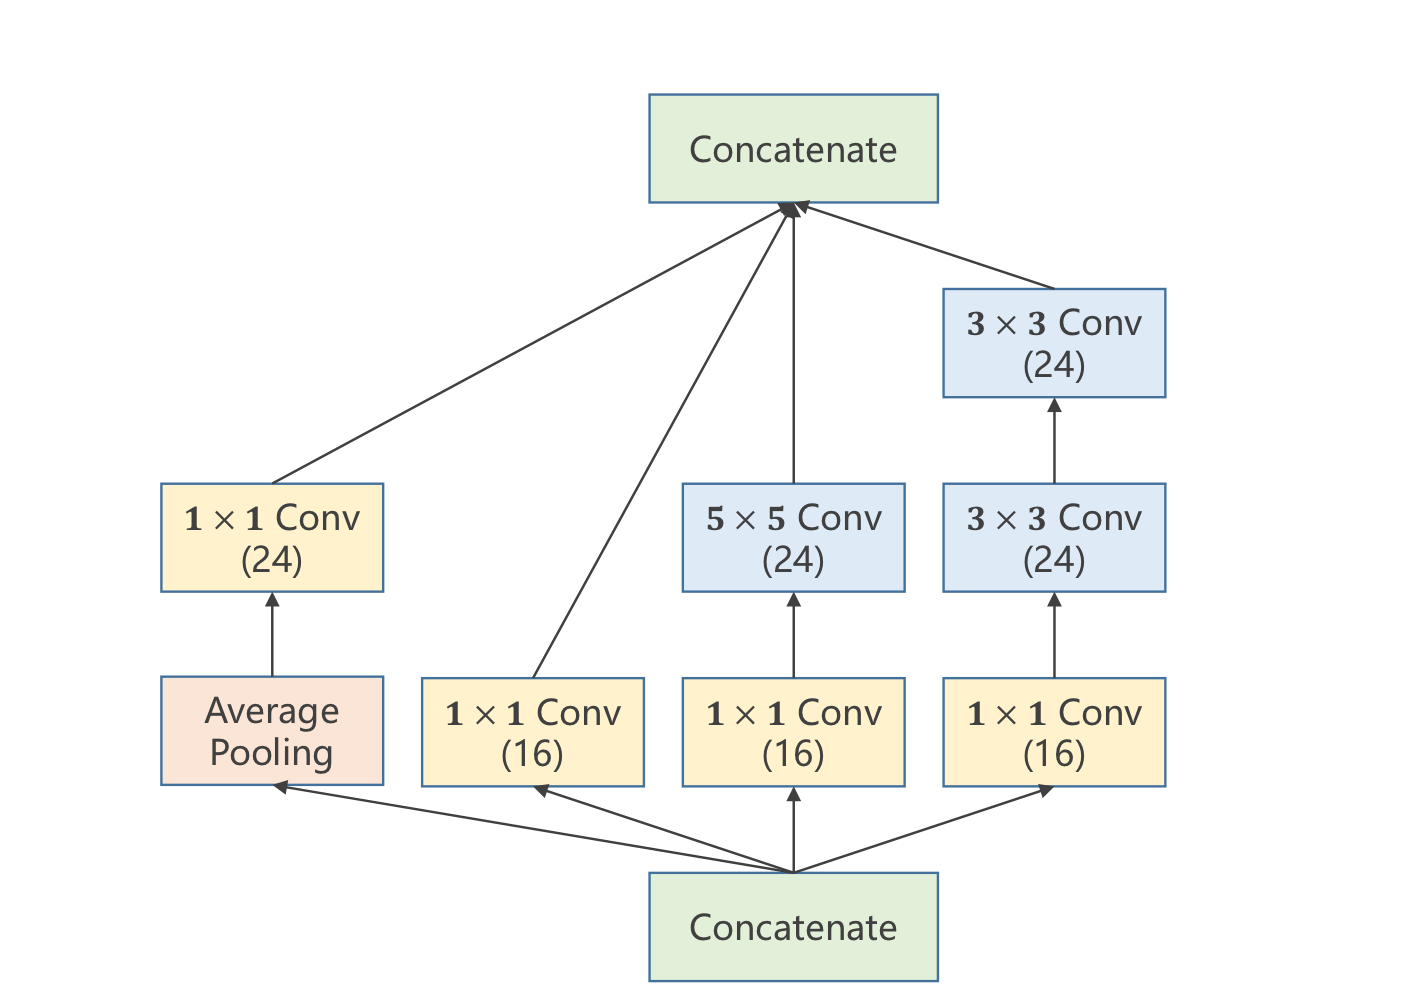


如上所示就是一个Inception Module


[1,  300]loss:2.297
[1,  600]loss:1.381
[1,  900]loss:0.328
Accuracy on test set: 93.600000 %
[2,  300]loss:0.191
[2,  600]loss:0.144
[2,  900]loss:0.121
Accuracy on test set: 96.560000 %
[3,  300]loss:0.099
[3,  600]loss:0.087
[3,  900]loss:0.083
Accuracy on test set: 97.790000 %
[4,  300]loss:0.072
[4,  600]loss:0.067
[4,  900]loss:0.059
Accuracy on test set: 98.460000 %
[5,  300]loss:0.054
[5,  600]loss:0.059
[5,  900]loss:0.053
Accuracy on test set: 98.080000 %
[6,  300]loss:0.044
[6,  600]loss:0.049
[6,  900]loss:0.049
Accuracy on test set: 98.600000 %
[7,  300]loss:0.042
[7,  600]loss:0.039
[7,  900]loss:0.043
Accuracy on test set: 98.640000 %
[8,  300]loss:0.037
[8,  600]loss:0.032
[8,  900]loss:0.039
Accuracy on test set: 98.820000 %
[9,  300]loss:0.031
[9,  600]loss:0.033
[9,  900]loss:0.033
Accuracy on test set: 98.760000 %
[10,  300]loss:0.027
[10,  600]loss:0.029
[10,  900]loss:0.031
Accuracy on test set: 98.870000 %


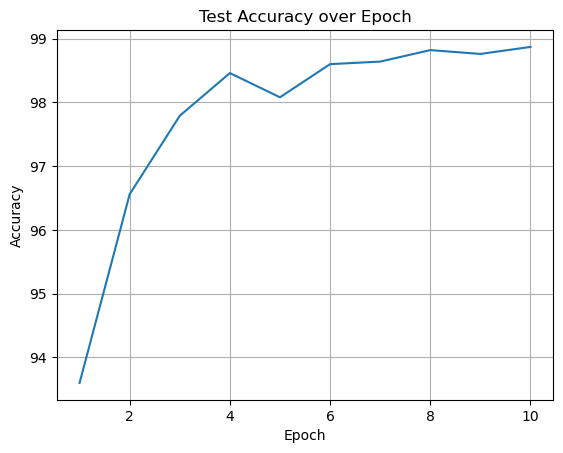

In [11]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn as nn


#Prepare Dataset
batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

train_dataset = datasets.MNIST(root='./dataset/mnist/',
                               train=True,
                               download=True,
                               transform=transform
                               )
train_loader = DataLoader(train_dataset,
                          shuffle = True,
                          batch_size = batch_size
                          )
test_dataset = datasets.MNIST(root= './dataset/mnist/',
                              train = False,
                              transform= transform
                              )
test_loader = DataLoader(test_dataset,
                         shuffle = False,
                         batch_size = batch_size
                         )

#implementation of Inception Module
class InceptionA(nn.Module):
    def __init__(self,in_channels):
        super(InceptionA,self).__init__()
        self.branch_pool = nn.Conv2d(in_channels,24,kernel_size = 1)

        self.branch1x1 = nn.Conv2d(in_channels,16,kernel_size=1)

        self.branch5x5_1 = nn.Conv2d(in_channels,16,kernel_size = 1)
        self.branch5x5_2 = nn.Conv2d(16,24,kernel_size=5,padding=2)

        self.branch3x3_1 = nn.Conv2d(in_channels,16,kernel_size=1)
        self.branch3x3_2 = nn.Conv2d(16,24,kernel_size = 3,padding=1)
        self.branch3x3_3 = nn.Conv2d(24,24,kernel_size= 3,padding=1)
    
    def forward(self,x):
        branch_pool = F.avg_pool2d(x,kernel_size=3,stride=1,padding=1)
        branch_pool = self.branch_pool(branch_pool)

        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)
        branch3x3 = self.branch3x3_3(branch3x3)

        outputs = [branch1x1,branch5x5,branch3x3,branch_pool]
        return torch.cat(outputs,dim = 1)
    

#Dessign a model
class NET (torch.nn.Module):
    def __init__(self):
        super(NET,self).__init__()
        self.conv1 = torch.nn.Conv2d(1,10,kernel_size = 5,padding=1,stride=1)
        self.conv2 = torch.nn.Conv2d(88,20,kernel_size = 4,padding=1,stride=1)
        self.conv3 = torch.nn.Conv2d(88,40,kernel_size = 5,padding=1,stride=1)

        self.incep1 = InceptionA(in_channels=10)
        self.incep2 = InceptionA(in_channels=20)
        self.incep3 = InceptionA(in_channels=40)

        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(88*2*2,10)

    def forward(self,x):
        batch_size = x.size(0)
        x = self.pooling(F.relu(self.conv1(x)))
        x = self.incep1(x)
        x = self.pooling(F.relu(self.conv2(x)))
        x = self.incep2(x)
        x = self.pooling(F.relu(self.conv3(x)))
        x = self.incep3(x)
        #在 PyTorch 中，view 函数用于改变张量的形状。参数中的 -1 是一种简便的写法，用于自动推断这个维度的大小。
        x = x.view(batch_size,-1)
        x = self.fc(x)
        return x
model = NET()

#Construct Loss and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01, momentum = 0.5)

#train and test

def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader,0):
        inputs,target = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs,target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx%300 == 299:
            print('[%d,%5d]loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss = 0.0

def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            outputs = model(images)
            _,predicted = torch.max(outputs.data,dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuracy = 100*correct/total
    print('Accuracy on test set: %f %%' % (accuracy))
    return accuracy

#excute
num_epochs = 10
accuracy_value = []
for epoch in range(num_epochs):
    train (epoch)
    accuracy = test()
    accuracy_value.append(accuracy) 

plt.plot(range(1,num_epochs+1),accuracy_value)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epoch')
plt.grid(True)
plt.show()

使用了GoogLeNet的网络准确度最高可以达到98.8%左右，而这还是尚未讲最后的全连接层层数增多的情况，为了比较，我们下面只引入ResNet网络构建model，并查看最后的准确率。

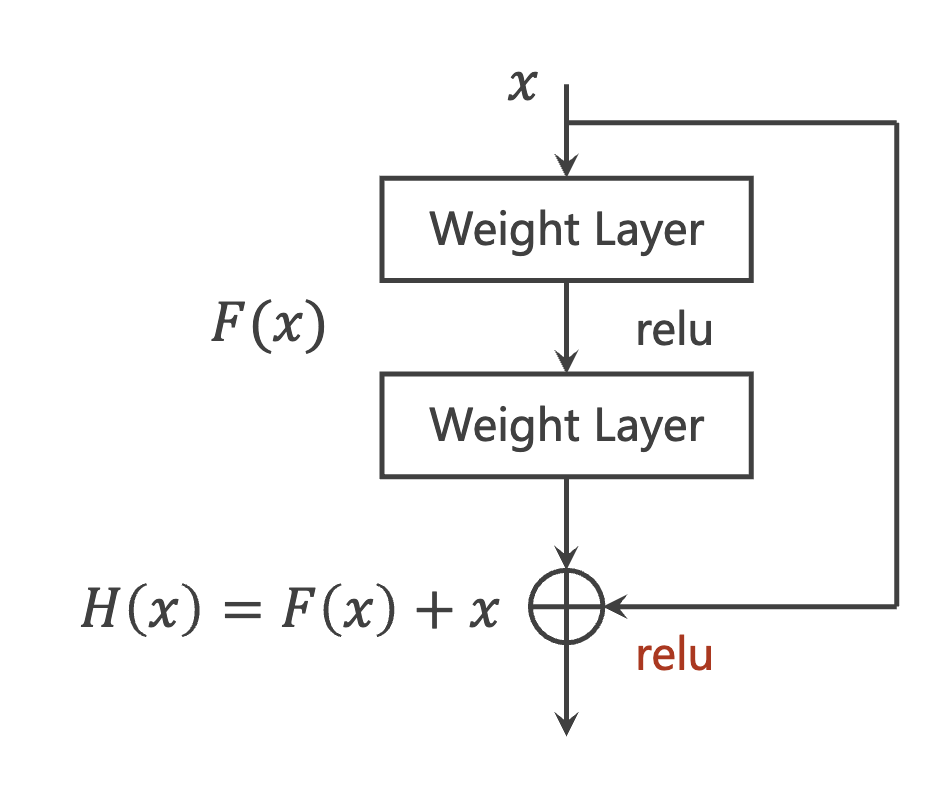

如下图所示，为一个常见的ResNet结构

[1,  300]loss:0.781
[1,  600]loss:0.171
[1,  900]loss:0.122
Accuracy on test set: 97.130000 %
[2,  300]loss:0.095
[2,  600]loss:0.081
[2,  900]loss:0.072
Accuracy on test set: 97.960000 %
[3,  300]loss:0.062
[3,  600]loss:0.058
[3,  900]loss:0.055
Accuracy on test set: 98.100000 %
[4,  300]loss:0.045
[4,  600]loss:0.049
[4,  900]loss:0.046
Accuracy on test set: 98.660000 %
[5,  300]loss:0.037
[5,  600]loss:0.041
[5,  900]loss:0.036
Accuracy on test set: 98.600000 %
[6,  300]loss:0.036
[6,  600]loss:0.030
[6,  900]loss:0.031
Accuracy on test set: 98.830000 %
[7,  300]loss:0.027
[7,  600]loss:0.029
[7,  900]loss:0.025
Accuracy on test set: 98.690000 %
[8,  300]loss:0.025
[8,  600]loss:0.027
[8,  900]loss:0.023
Accuracy on test set: 98.780000 %
[9,  300]loss:0.021
[9,  600]loss:0.020
[9,  900]loss:0.023
Accuracy on test set: 99.050000 %
[10,  300]loss:0.016
[10,  600]loss:0.021
[10,  900]loss:0.020
Accuracy on test set: 98.830000 %


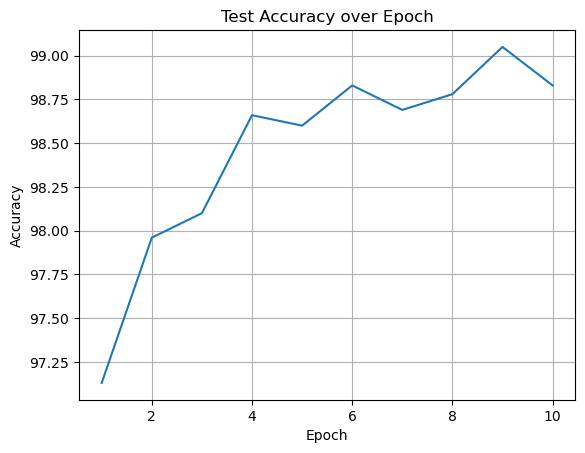

In [12]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn as nn


#Prepare Dataset
batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

train_dataset = datasets.MNIST(root='./dataset/mnist/',
                               train=True,
                               download=True,
                               transform=transform
                               )
train_loader = DataLoader(train_dataset,
                          shuffle = True,
                          batch_size = batch_size
                          )
test_dataset = datasets.MNIST(root= './dataset/mnist/',
                              train = False,
                              transform= transform
                              )
test_loader = DataLoader(test_dataset,
                         shuffle = False,
                         batch_size = batch_size
                         )

#implementation of Inception Module
class ResidualBlock(nn.Module):
    def __init__(self,channels):
        super(ResidualBlock,self).__init__()
        self.channels = channels
        self.conv1 = nn.Conv2d(channels,channels,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(channels,channels,kernel_size=3,padding=1)
    def forward(self,x):
        y = F.relu(self.conv1(x))
        y = self.conv2(y)
        return F.relu(x+y)
    

#Dessign a model
class NET (torch.nn.Module):
    def __init__(self):
        super(NET,self).__init__()
        self.conv1 = torch.nn.Conv2d(1,10,kernel_size = 5,padding=1,stride=1)
        self.conv2 = torch.nn.Conv2d(10,20,kernel_size = 4,padding=1,stride=1)
        self.conv3 = torch.nn.Conv2d(20,40,kernel_size = 5,padding=1,stride=1)

        self.Res1 = ResidualBlock(channels=10)
        self.Res2 = ResidualBlock(channels=20)
        self.Res3 = ResidualBlock(channels=40)

        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(40*2*2,10)

    def forward(self,x):
        batch_size = x.size(0)
        x = self.pooling(F.relu(self.conv1(x)))
        x = self.Res1(x)
        x = self.pooling(F.relu(self.conv2(x)))
        x = self.Res2(x)
        x = self.pooling(F.relu(self.conv3(x)))
        x = self.Res3(x)
        #在 PyTorch 中，view 函数用于改变张量的形状。参数中的 -1 是一种简便的写法，用于自动推断这个维度的大小。
        x = x.view(batch_size,-1)
        x = self.fc(x)
        return x
model = NET()

#Construct Loss and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01, momentum = 0.5)

#train and test

def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader,0):
        inputs,target = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs,target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx%300 == 299:
            print('[%d,%5d]loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss = 0.0

def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            outputs = model(images)
            _,predicted = torch.max(outputs.data,dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuracy = 100*correct/total
    print('Accuracy on test set: %f %%' % (accuracy))
    return accuracy

#excute
num_epochs = 10
accuracy_value = []
for epoch in range(num_epochs):
    train (epoch)
    accuracy = test()
    accuracy_value.append(accuracy) 

plt.plot(range(1,num_epochs+1),accuracy_value)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epoch')
plt.grid(True)
plt.show()

仅仅改变model的结构就使MNIST预测的正确了提高到了99.05%。所以不同的model结构对预测结果的影响是不同的，使用者需要根据计算机算力以及应用场合合理选择模型的架构。